#### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data=pd.read_csv("/content/Data from marketing team - Raw Data.csv")

In [ ]:
data.shape

(33, 16)

In [ ]:
data.head()

,Campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clicks (ULC),Click-Through Rate (CTR),Unique Click-Through Rate (Unique CTR),Amount Spent in INR,Cost Per Click (CPC),Cost per Result (CPR)
0,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,25-34,"Group 1 (Australia, Canada, United Kingdom, Gh...",11387,23283,2.044700,487,406,180,2.091655,3.565469,1092.24,2.242790,6.07
1,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,35-44,"Group 1 (Australia, Canada, United Kingdom, Gh...",8761,15683,1.790092,484,376,154,3.086144,4.291748,835.46,1.726165,5.43
2,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,45-54,"Group 1 (Australia, Canada, United Kingdom, Gh...",2867,6283,2.191489,198,145,65,3.151361,5.057551,319.38,1.613038,4.91
3,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,55-64,"Group 1 (Australia, Canada, United Kingdom, Gh...",889,1890,2.125984,49,40,21,2.592593,4.499438,86.25,1.760117,4.11
4,Campaign 2,SHU3_ (Students Apart from India and US),Students,18-24,"Group 2 (Australia, Canada, United Kingdom, Gh...",29675,39161,1.319663,2593,1994,1095,6.621384,6.719461,1193.94,0.460448,1.09


#### Changing Group to smaller names


In [ ]:
data['Geography'] = data['Geography'].replace({'Group 1 (Australia, Canada, United Kingdom, Ghana, Nigeria, Pakistan, United States)': 'Group1',
                                               'Group 2 (Australia, Canada, United Kingdom, Ghana, Niger, Nigeria, Nepal, Pakistan, Thailand, Taiwan)': 'Group2'})

In [ ]:
data[:10]

,Campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clicks (ULC),Click-Through Rate (CTR),Unique Click-Through Rate (Unique CTR),Amount Spent in INR,Cost Per Click (CPC),Cost per Result (CPR)
0,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,25-34,Group1,11387,23283,2.044700,487,406,180,2.091655,3.565469,1092.24,2.242790,6.07
1,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,35-44,Group1,8761,15683,1.790092,484,376,154,3.086144,4.291748,835.46,1.726165,5.43
2,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,45-54,Group1,2867,6283,2.191489,198,145,65,3.151361,5.057551,319.38,1.613038,4.91
3,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,55-64,Group1,889,1890,2.125984,49,40,21,2.592593,4.499438,86.25,1.760117,4.11
4,Campaign 2,SHU3_ (Students Apart from India and US),Students,18-24,Group2,29675,39161,1.319663,2593,1994,1095,6.621384,6.719461,1193.94,0.460448,1.09
5,Campaign 2,SHU3_ (Students Apart from India and US),Students,13-17,Group2,14753,25705,1.742357,969,698,435,3.769695,4.731241,299.51,0.309088,0.69
6,Campaign 2,SHU3_ (Students Apart from India and US),Students,25-34,Group2,2066,2447,1.184414,181,141,65,7.396812,6.824782,85.57,0.472773,1.32
7,Campaign 3,SHU_Students(Australia),Students,13-17,Australia,2271,2616,1.151915,61,55,28,2.331804,2.421841,475.85,7.800793,16.99
8,Campaign 3,SHU_Students(Australia),Students,18-24,Australia,704,734,1.042614,49,46,13,6.675749,6.534091,283.17,5.778967,21.78
9,Campaign 3,SHU_Students(Australia),Students,25-34,Australia,212,222,1.047170,9,8,3,4.054054,3.773585,91.66,10.184692,30.55


In [ ]:
data["Campaign ID"].value_counts()

Campaign 1     4
Campaign 2     3
Campaign 3     3
Campaign 4     3
Campaign 5     3
Campaign 7     3
Campaign 8     3
Campaign 9     3
Campaign 10    3
Campaign 11    3
Campaign 6     2
Name: Campaign ID, dtype: int64

We have 2 different audience for Campaign 6, 4 different audience for Campaign 1 and 3 different audience for rest of the Campaigns.

### **Deciding Factor-CPR**
5 worst performing campaigns on considering *Cost per Result (CPR)* alone


In [ ]:
d1=data.sort_values(by=["Cost per Result (CPR)"],ascending=False)
l1=d1["Campaign ID"]
l2,l3,l4=d1["Campaign Name"],d1["Cost Per Click (CPC)"],d1["Cost per Result (CPR)"]
l=pd.concat([l1,l2,l3,l4],axis=1,keys=("Campaign ID","Campaign Name","Cost Per Click (CPC)","Cost per Result (CPR)"))
l.head(5)

,Campaign ID,Campaign Name,Cost Per Click (CPC),Cost per Result (CPR)
9,Campaign 3,SHU_Students(Australia),10.184692,30.55
29,Campaign 10,SHU_Students(UK),8.736923,28.40
8,Campaign 3,SHU_Students(Australia),5.778967,21.78
7,Campaign 3,SHU_Students(Australia),7.800793,16.99
32,Campaign 11,SHU_Students (USA),5.251404,15.75


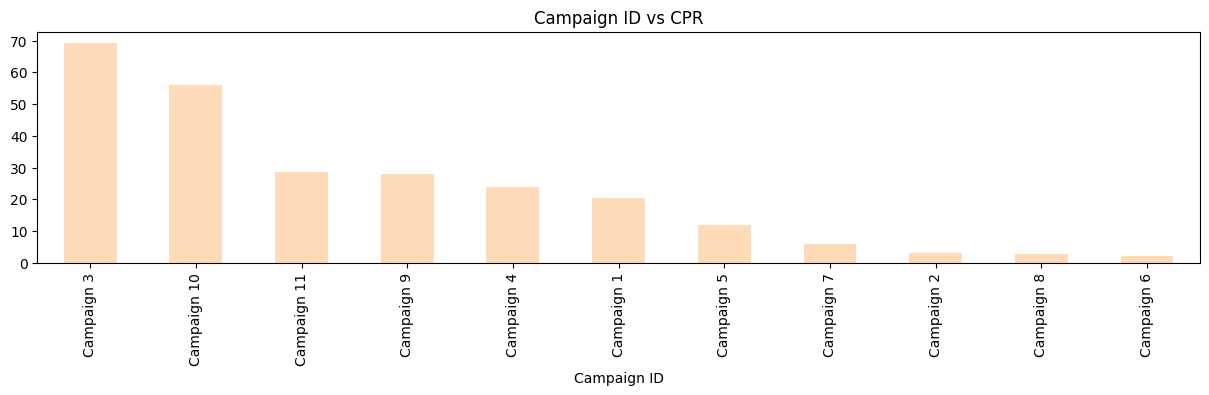

In [ ]:
plt.figure(figsize=(15,3))
d1=data.groupby('Campaign ID')["Cost per Result (CPR)"].agg("sum").sort_values(ascending=False).plot(kind="bar",color="peachpuff")
plt.title("Campaign ID vs CPR")
plt.show()

*CPR tells you if you are spending too much money on acquisition and cutting into your bottom line. Ultimately, it is a measure of return on investment.*

**So CPR value should be as low as possible**




The worst three performing Campaigns **on the basis of CPR** are-

*   *Campaign 3* for *SHU_Students(Australia)* Age:25-34
*   *Campaign 10* for *SHU_Students(UK)*       Age:25-34
*   *Campaign 3* for *SHU_Students(Australia)* Age:18-24



### **Deciding Factor-Frequency**
Worst performing campaigns on considering *Frequency* alone


<Figure size 1000x1000 with 0 Axes>

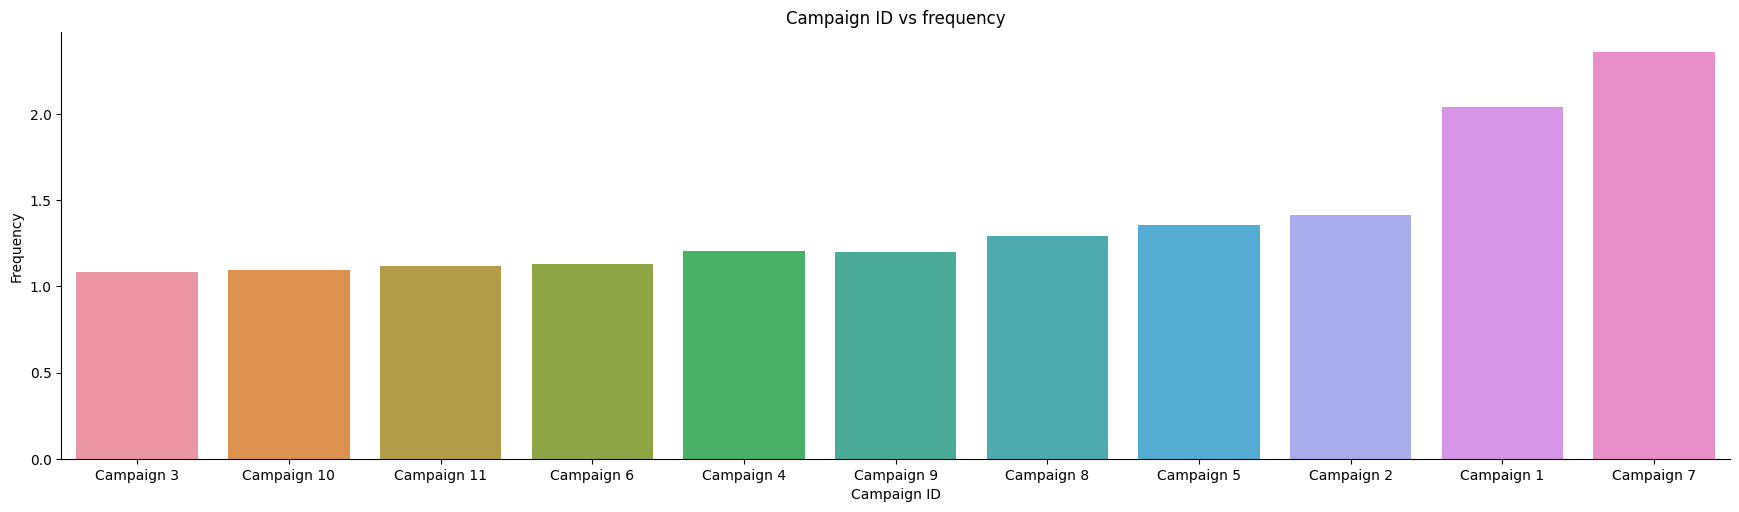

In [ ]:
d2=data.sort_values(by="Frequency")
plt.figure(figsize=(10,10))
ax=sns.catplot(x="Campaign ID",y="Frequency",kind="bar",data=d2,aspect=3.5,errorbar=None
               )
plt.title("Campaign ID vs frequency")
plt.show()

In [ ]:
d2.head()

,Campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clicks (ULC),Click-Through Rate (CTR),Unique Click-Through Rate (Unique CTR),Amount Spent in INR,Cost Per Click (CPC),Cost per Result (CPR)
8,Campaign 3,SHU_Students(Australia),Students,18-24,Australia,704,734,1.042614,49,46,13,6.675749,6.534091,283.17,5.778967,21.78
9,Campaign 3,SHU_Students(Australia),Students,25-34,Australia,212,222,1.047170,9,8,3,4.054054,3.773585,91.66,10.184692,30.55
28,Campaign 10,SHU_Students(UK),Students,18-24,UK,741,785,1.059379,39,34,20,4.968153,4.588394,255.57,6.553077,12.78
29,Campaign 10,SHU_Students(UK),Students,25-34,UK,338,365,1.079882,13,11,4,3.561644,3.254438,113.58,8.736923,28.40
31,Campaign 11,SHU_Students (USA),Students,18-24,USA,305,332,1.088525,43,37,28,12.951807,12.131148,159.14,3.700843,5.68


*Frequency is the average number of times each person saw the ad.*

The more it is greater than 1 the better the ad campaign is.


The worst three performing Campaigns **on the basis of Frequency** are-

*   *Campaign 3* for *SHU_Students(Australia)* Age:18-24
*   *Campaign 3* for *SHU_Students(Australia)*       Age:25-34
*   *Campaign 10* for *SHU_Students(UK)* Age:18-24



### **Deciding Factor- Unique Click-Through Rate (Unique CTR)**
Worst performing campaigns on considering *Unique CTR* alone


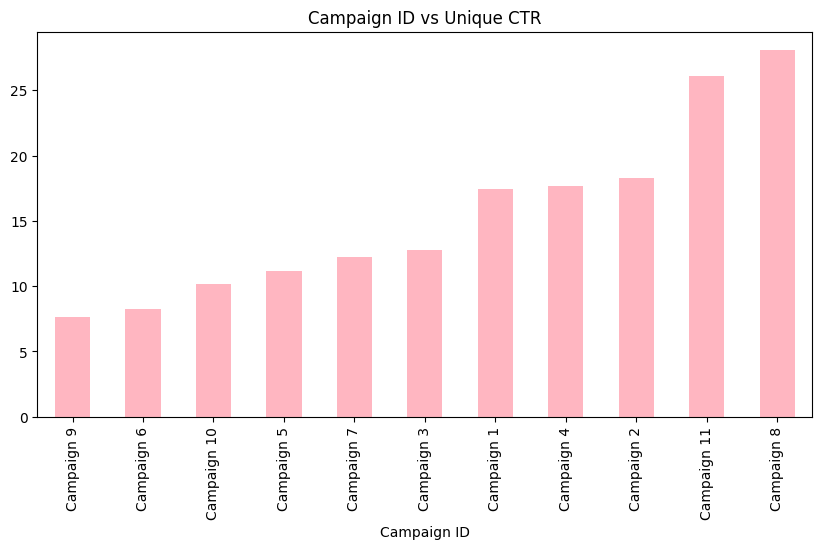

In [ ]:
plt.figure(figsize=(10,5))
d4=data.sort_values(by="Unique Click-Through Rate (Unique CTR)")
data.groupby('Campaign ID')["Unique Click-Through Rate (Unique CTR)"].agg("sum").sort_values(ascending=True).plot(kind="bar",color="lightpink")
plt.title("Campaign ID vs Unique CTR")
plt.show()

In [ ]:
d4

,Campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clicks (ULC),Click-Through Rate (CTR),Unique Click-Through Rate (Unique CTR),Amount Spent in INR,Cost Per Click (CPC),Cost per Result (CPR)
26,Campaign 9,SHU_Students(UAE),Students,13-17,UAE,1579,2079,1.316656,35,32,20,1.683502,2.026599,104.63,2.989420,5.23
25,Campaign 9,SHU_Students(UAE),Students,18-24,UAE,2862,3234,1.129979,72,60,27,2.226345,2.096436,316.14,4.390839,11.71
27,Campaign 10,SHU_Students(UK),Students,13-17,UK,2557,2941,1.150176,69,60,33,2.346141,2.346500,487.52,7.065507,14.77
7,Campaign 3,SHU_Students(Australia),Students,13-17,Australia,2271,2616,1.151915,61,55,28,2.331804,2.421841,475.85,7.800793,16.99
15,Campaign 5,SHU_Students(Ghana),Students,13-17,Ghana,5355,8920,1.665733,180,154,93,2.017937,2.875817,177.46,0.985889,1.91
29,Campaign 10,SHU_Students(UK),Students,25-34,UK,338,365,1.079882,13,11,4,3.561644,3.254438,113.58,8.736923,28.40
24,Campaign 9,SHU_Students(UAE),Students,25-34,UAE,2892,3347,1.157331,135,102,41,4.033463,3.526971,455.49,3.373999,11.11
0,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,25-34,Group1,11387,23283,2.044700,487,406,180,2.091655,3.565469,1092.24,2.242790,6.07
10,Campaign 4,SHU_Students (Canada),Students,13-17,Canada,2330,3146,1.350215,101,84,63,3.210426,3.605150,528.08,5.228488,8.38
18,Campaign 7,SHU_Students(Nepal),Students,18-24,Nepal,18900,36659,1.939630,849,688,306,2.315939,3.640212,634.64,0.747515,2.07


*Unique Click Through Rate(UCTR)* is the percentage of people who saw your ad and clicked on the link.

A high UCTR often means that the content and ads that you have been putting out has been helpful and relevant.


The worst three performing Campaigns **on the basis of UCTR** are-

*   *Campaign 9* for *SHU_Students(UAE)* Age:13-17
*   *Campaign 9* for *SHU_Students(UAE)*       Age:18-24
*   *Campaign 10* for *SHU_Students(UK)* Age:13-17



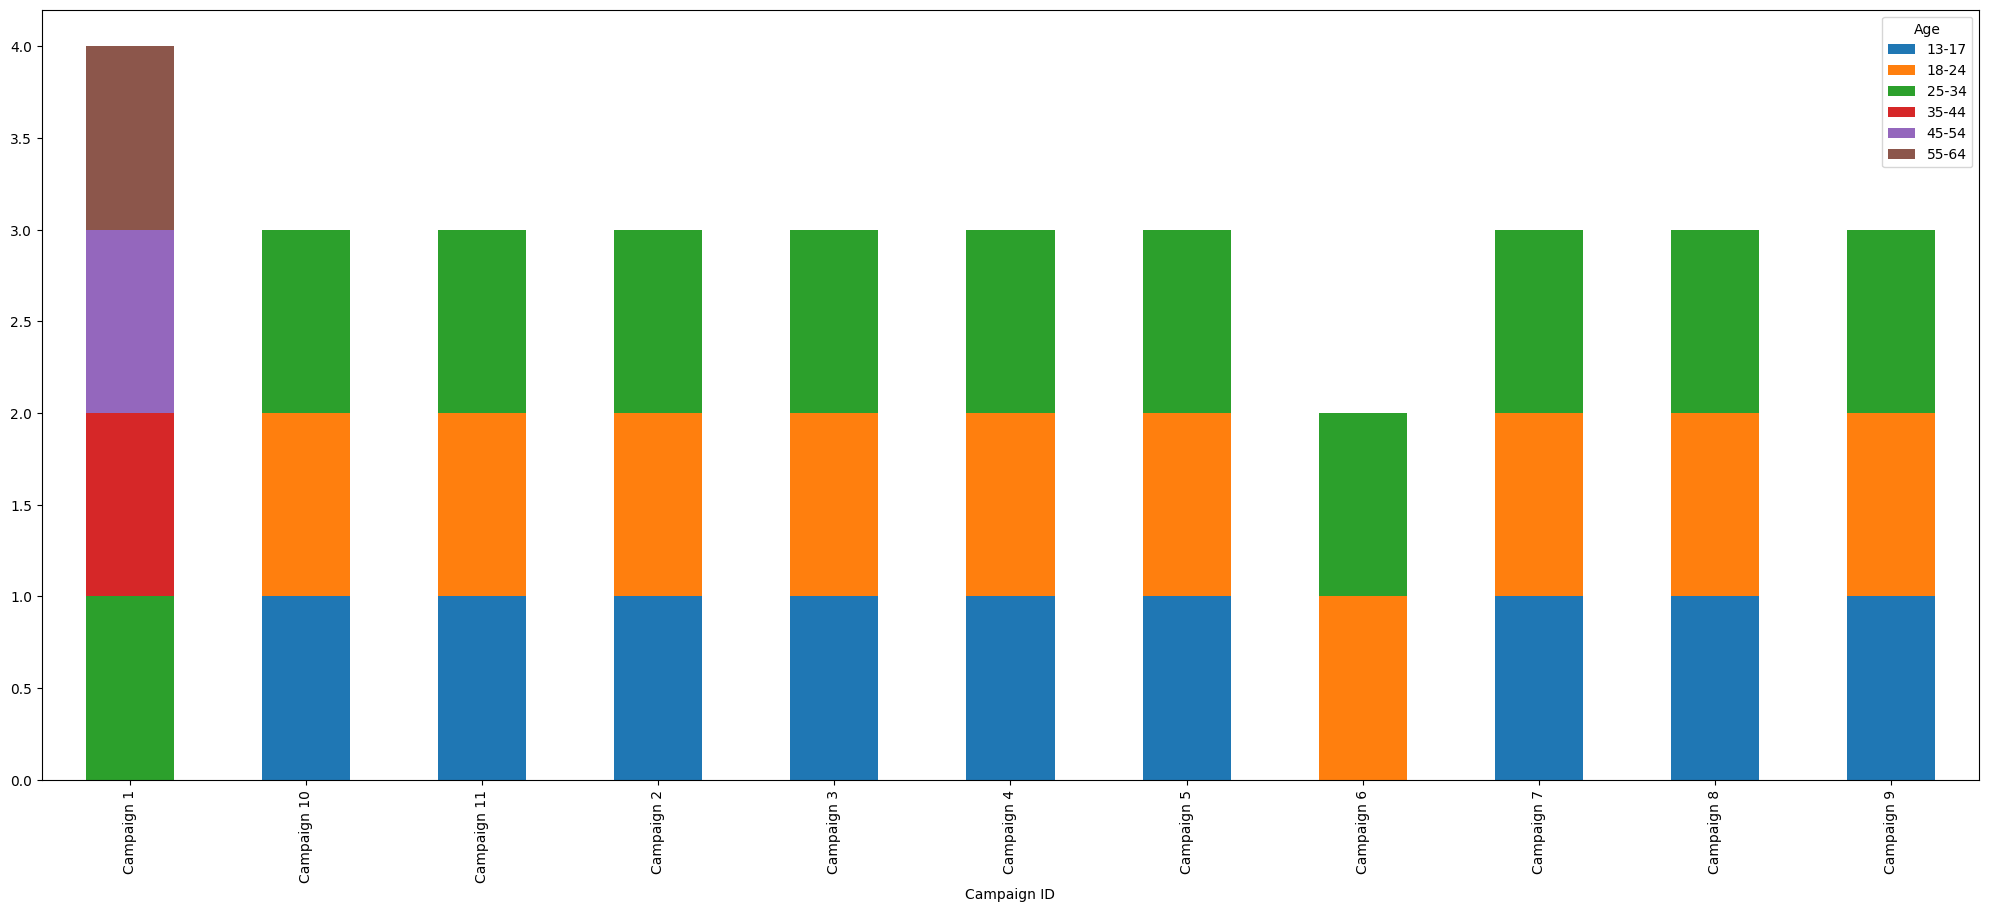

In [ ]:
ax=data.groupby(["Campaign ID","Age"])["Age"].count().unstack().plot(kind="bar",stacked=True,figsize=(25,10))
plt.show()


### **Geographical Analysis**

In [ ]:
fig = px.choropleth(
    data_frame=data,
    locations='Geography',
    locationmode='country names',
    color='Amount Spent in INR',
    hover_data=['Amount Spent in INR'],
    title='Cost Analysis by Geography'
)
fig.show()

<ipython-input-16-dffb626e5cf8>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



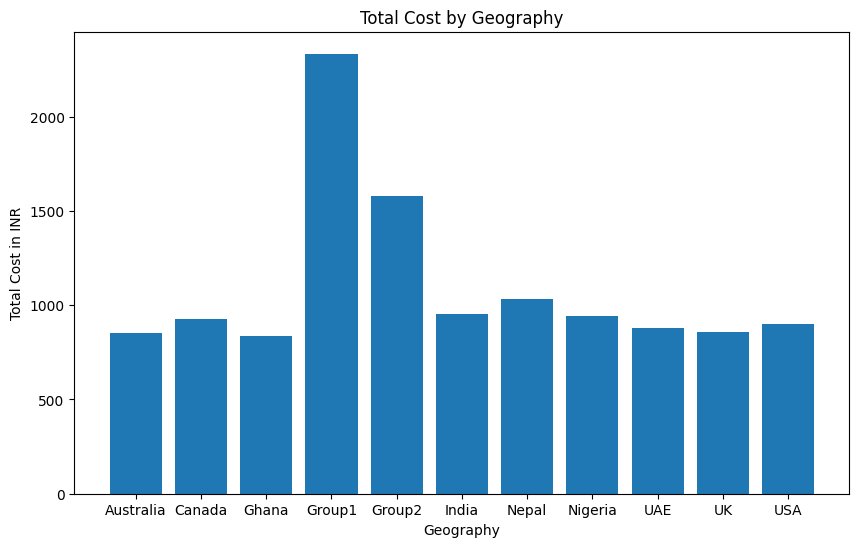

In [ ]:
geographical_data = data.groupby('Geography').sum()
cost = geographical_data['Amount Spent in INR']

plt.figure(figsize=(10, 6))
plt.title('Total Cost by Geography')
plt.bar(geographical_data.index, cost)
plt.xlabel('Geography')
plt.ylabel('Total Cost in INR')
plt.show()

### **Deciding Factor-Impressions and Clicks**
Worst performing campaigns on considering *Impressions and Clicks*


In [ ]:
impressions = data['Impressions']
clicks = data['Clicks']

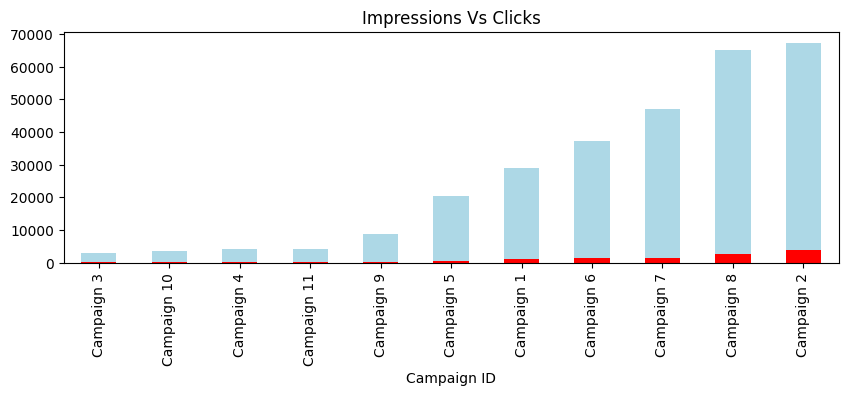

In [ ]:
plt.figure(figsize=(10,3))
data.groupby('Campaign ID')["Impressions"].agg("sum").sort_values(ascending=True).plot(kind="bar",color="lightblue")
data.groupby('Campaign ID')["Clicks"].agg("sum").sort_values(ascending=True).plot(kind="bar",color="red")
plt.title("Impressions Vs Clicks")
plt.show()

In [ ]:
m1=pd.DataFrame(data.groupby('Campaign ID')["Impressions"].agg("sum"))
m2=pd.DataFrame(data.groupby('Campaign ID')["Clicks"].agg("sum"))
print(m2.head())
print(m1.head())
print(len(m2["Clicks"]))
l=[]
print(m2["Clicks"][0])
for i in range(11):
  l.append(m2["Clicks"][i]/m1["Impressions"][i])
l.sort()
l


             Clicks
Campaign ID        
Campaign 1     1218
Campaign 10     121
Campaign 11     178
Campaign 2     3743
Campaign 3      119
             Impressions
Campaign ID             
Campaign 1         47139
Campaign 10         4091
Campaign 11         2900
Campaign 2         67313
Campaign 3          3572
11
1218


[0.021774131718163,
 0.02583847769362948,
 0.0279445727482679,
 0.029577120508433145,
 0.03163599082165698,
 0.033314669652855546,
 0.03758792890511733,
 0.040074994141082725,
 0.05560590079182327,
 0.06137931034482759,
 0.09543038586318768]

## **CONCLUSION**

**Campaign 3** (more precisely SHU_Students(Australia)) should be discontinued showing negative performance.

The KPIs(Key Performance Indicator) used to achieve the conclusion are-


*   Cost Per Result(CPR)
*   Frequency
*   Ratio of Clicks and Impressions

## So, ***Campaign 3*** should be discontinued.
